# Загрузка файла

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
figsize=(20, 15)

In [2]:
path = "benchmarks.csv"

In [3]:
df = pd.read_csv(
    path,
    delimiter=r",")

In [4]:
df.head()

,id,name,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,initial_connection_time,latency_avg,latency_std
0,91,../results/cache_high/91.txt,5000,300,5,1,200,1,0,3957.608948,1662.348,50.529,53.033
1,56,../results/cache_high/56.txt,0,300,25,1,300,1,0,7410.819271,2320.749,40.475,28.797
2,95,../results/cache_high/95.txt,5000,300,0,1,200,1,0,2014.498079,1560.837,99.270,61.322
3,83,../results/cache_high/83.txt,5000,300,50,1,200,1,0,8326.162613,1728.101,24.015,13.597
4,88,../results/cache_high/88.txt,5000,300,25,1,300,1,0,2463.887750,2074.608,121.646,149.489


# Анализ данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       288 non-null    int64  
 1   name                     288 non-null    object 
 2   cost                     288 non-null    int64  
 3   scale                    288 non-null    int64  
 4   percent_write            288 non-null    int64  
 5   pool_enabled             288 non-null    int64  
 6   count_connections        288 non-null    int64  
 7   cache_enabled            288 non-null    int64  
 8   base_in_cache            288 non-null    int64  
 9   tps                      288 non-null    float64
 10  initial_connection_time  288 non-null    float64
 11  latency_avg              288 non-null    float64
 12  latency_std              288 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 29.4+ KB


In [6]:
df.describe()

,id,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,initial_connection_time,latency_avg,latency_std
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.00000,288.000000,288.000000,288.000000,288.000000
mean,225.770833,2000.000000,170.000000,20.000000,0.666667,163.541667,0.333333,0.50000,7211.496139,1892.462951,29.424264,28.324972
std,111.299340,2164.007123,130.226284,19.719284,0.472225,98.192506,0.472225,0.50087,3173.479670,1622.020318,34.760777,54.845688
min,21.000000,0.000000,40.000000,0.000000,0.000000,50.000000,0.000000,0.00000,1019.225322,257.979000,3.120000,0.888000
25%,154.750000,0.000000,40.000000,3.750000,0.000000,87.500000,0.000000,0.00000,5008.747236,789.198000,12.049500,6.790000
50%,239.500000,1000.000000,170.000000,15.000000,1.000000,150.000000,0.000000,0.50000,7361.520214,1459.024500,21.086000,12.506000
75%,324.250000,5000.000000,300.000000,31.250000,1.000000,225.000000,1.000000,1.00000,9031.665231,2070.204750,31.395750,24.715250
max,396.000000,5000.000000,300.000000,50.000000,1.000000,400.000000,1.000000,1.00000,16151.522722,8015.758000,293.830000,577.504000


In [7]:
df.loc[df.count_connections == 400]

,id,name,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,initial_connection_time,latency_avg,latency_std
209,38,../results/no_cache_low/8.txt,0,40,25,0,400,0,1,13024.498727,7996.572,30.649,32.752
220,34,../results/no_cache_low/4.txt,0,40,50,0,400,0,1,12499.244419,8015.758,31.962,34.952
280,312,../results/no_cache_low/12.txt,0,40,5,0,400,0,1,13211.430803,7983.630,30.230,28.101


**Заменю значение 400 на 300**

In [8]:
df.loc[df.count_connections == 400, 'count_connections'] = 300 

In [9]:
 df.loc[df.count_connections == 400].count()

id                         0
name                       0
cost                       0
scale                      0
percent_write              0
pool_enabled               0
count_connections          0
cache_enabled              0
base_in_cache              0
tps                        0
initial_connection_time    0
latency_avg                0
latency_std                0
dtype: int64

In [10]:
heat_data = df.loc[:, [
    'cost',
    'scale',
    'percent_write',
    'count_connections',
    'tps'
]].copy()

In [11]:
heat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cost               288 non-null    int64  
 1   scale              288 non-null    int64  
 2   percent_write      288 non-null    int64  
 3   count_connections  288 non-null    int64  
 4   tps                288 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 11.4 KB


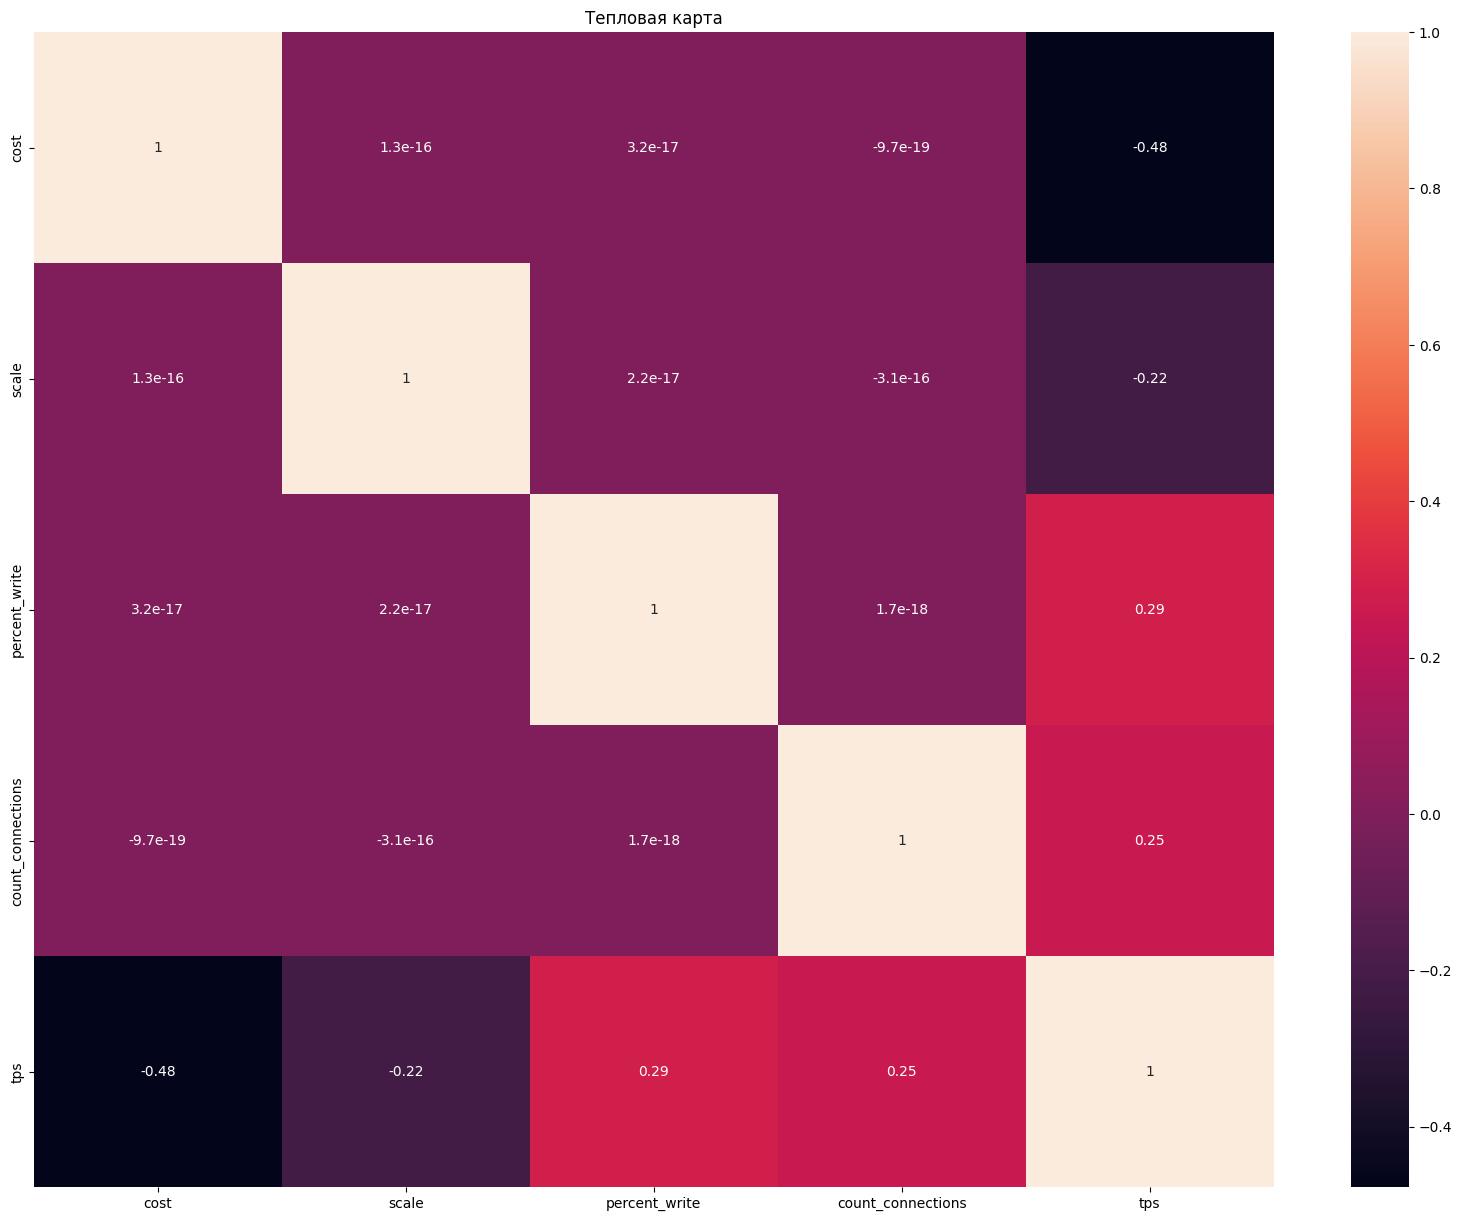

In [12]:
plt.figure(figsize=figsize)
sns.heatmap(heat_data.corr(), annot=True)
plt.title('Тепловая карта')
plt.show()

In [13]:
from scipy.stats import pearsonr, spearmanr

In [14]:
P, p_value_P = pearsonr(heat_data['cost'], heat_data['tps'])
S, p_value_S = spearmanr(heat_data['cost'], heat_data['tps'])
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.47740484554038093 p_value: 8.425655133751233e-18
Spearman correlation: -0.5044508907525077 p_value: 5.3542815720247073e-20


In [15]:
P, p_value_P = pearsonr(heat_data['tps'], heat_data['scale'])
S, p_value_S = spearmanr(heat_data['tps'], heat_data['scale'])
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.21588358052778084 p_value: 0.00022306287583219288
Spearman correlation: -0.211078258853609 p_value: 0.00030944196538336036


In [16]:
P, p_value_P = pearsonr(heat_data['tps'], heat_data['percent_write'])
S, p_value_S = spearmanr(heat_data['tps'], heat_data['percent_write'])
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.2876130202965474 p_value: 6.869041705733503e-07
Spearman correlation: 0.3019062509261565 p_value: 1.7544789778353072e-07


In [17]:
P, p_value_P = pearsonr(heat_data['tps'], heat_data['count_connections'])
S, p_value_S = spearmanr(heat_data['tps'], heat_data['count_connections'])
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.25104541222921994 p_value: 1.6245051154168193e-05
Spearman correlation: 0.32715849364158367 p_value: 1.3071373289548919e-08


**Никакой корреляции не наблюдается**

Разве что tps-scale p-value не такое маленькое, как у остальных, значит, тут ещё можно уловить закономерность в тестах.

Дубликатов в данных нет, пустых тоже, значит этот этап обработки пропускаю

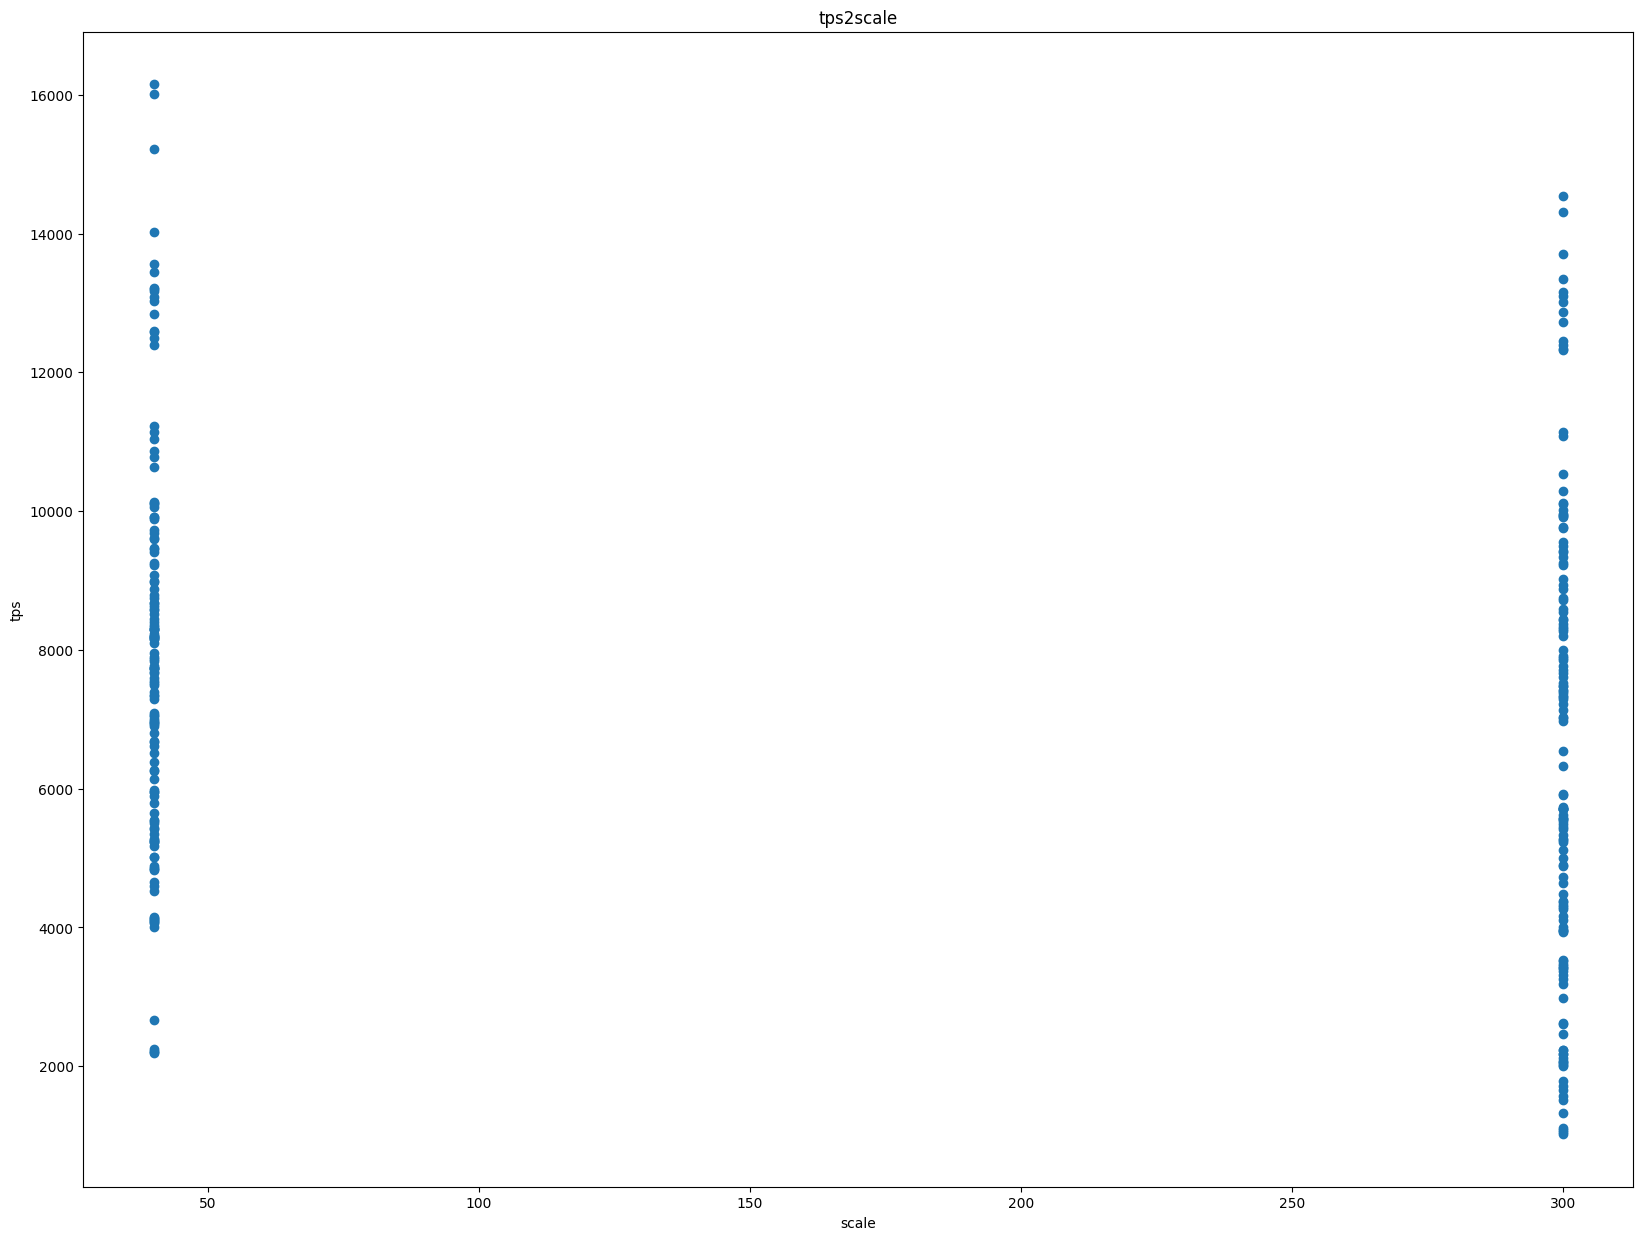

In [18]:
plt.figure(figsize=figsize)
plt.scatter(heat_data.scale, heat_data.tps)
plt.title("tps2scale")
plt.xlabel('scale')
plt.ylabel('tps')
plt.show()

видно, что на меньшем scale база работает лучше.
Нужно было бы больше тестов, чтобы понять есть ли корреляция между этими показателями,
а если её нет - то можно заменить признаком помещается ли в бд база или нет. 

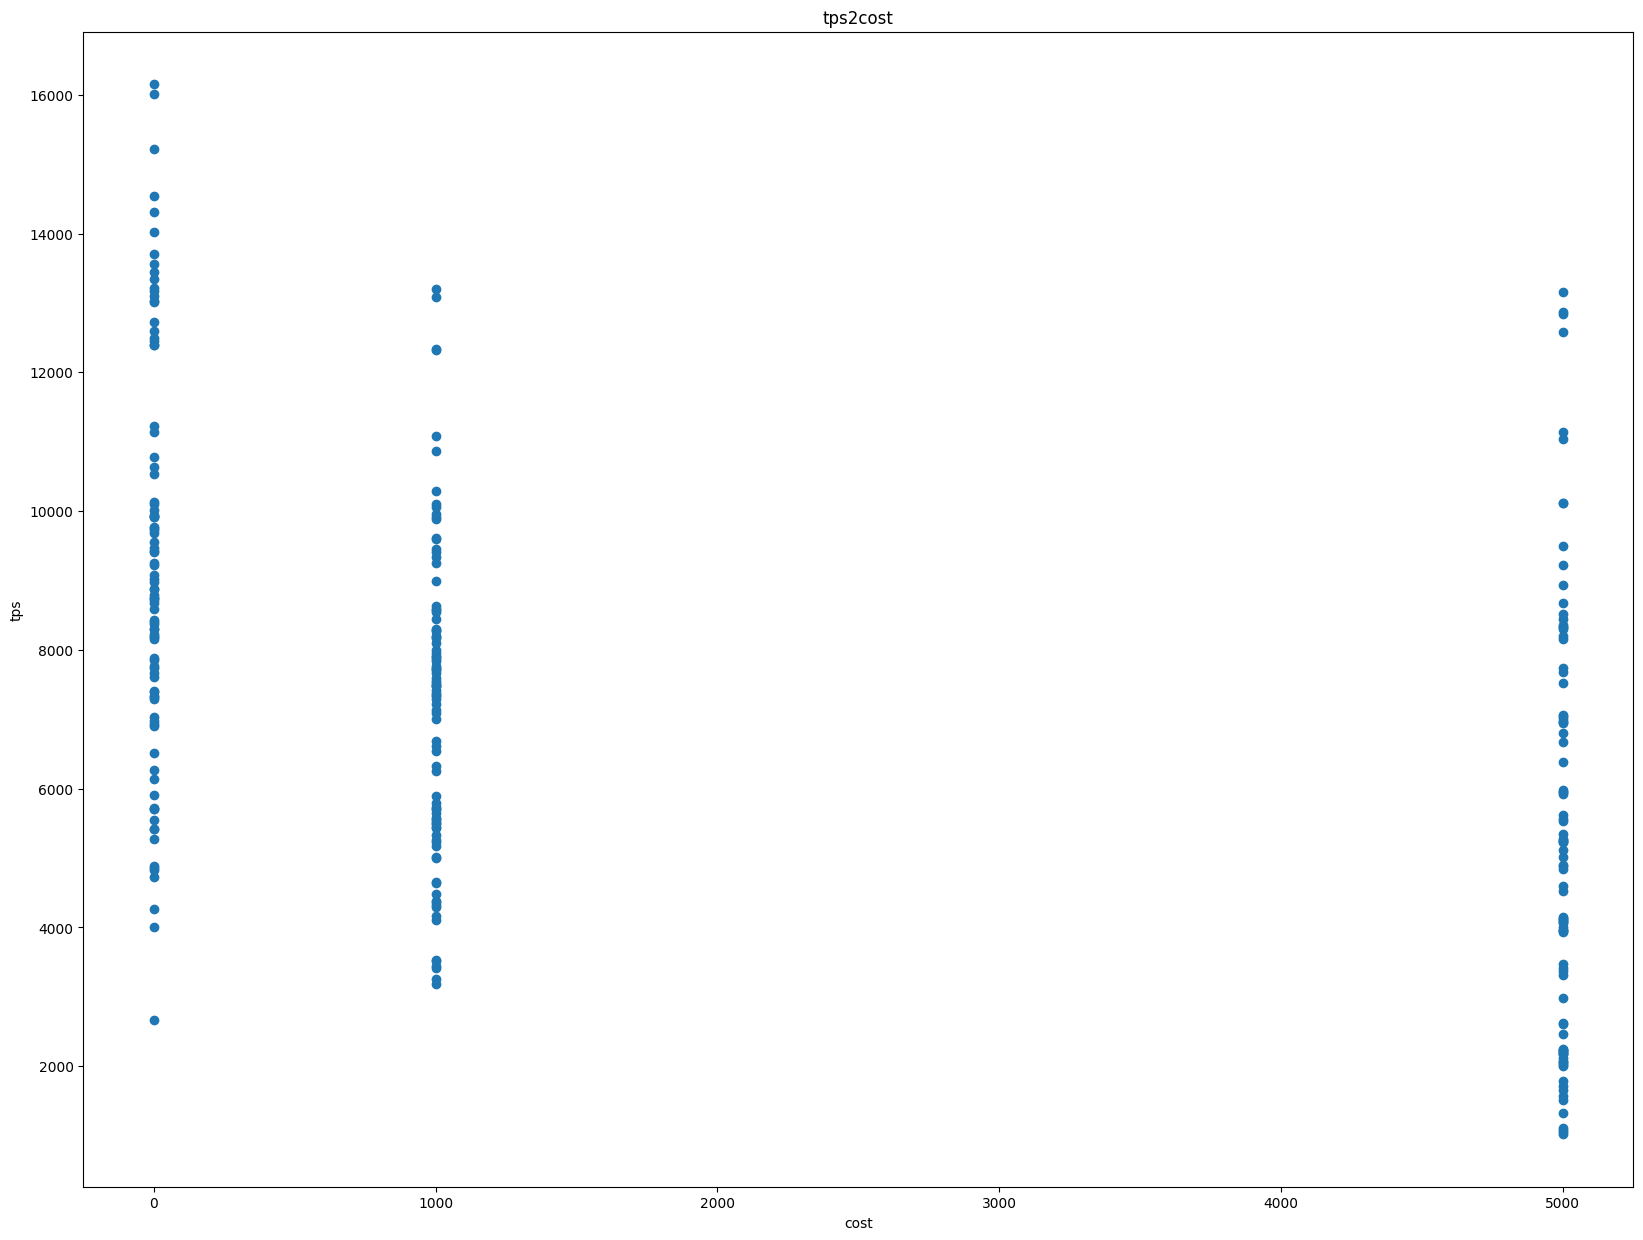

In [19]:
plt.figure(figsize=figsize)
plt.scatter(heat_data.cost, heat_data.tps)
plt.title("tps2cost")
plt.xlabel('cost')
plt.ylabel('tps')
plt.show()

на корреляции ничего не видно, но тут можно угадать кластеры.

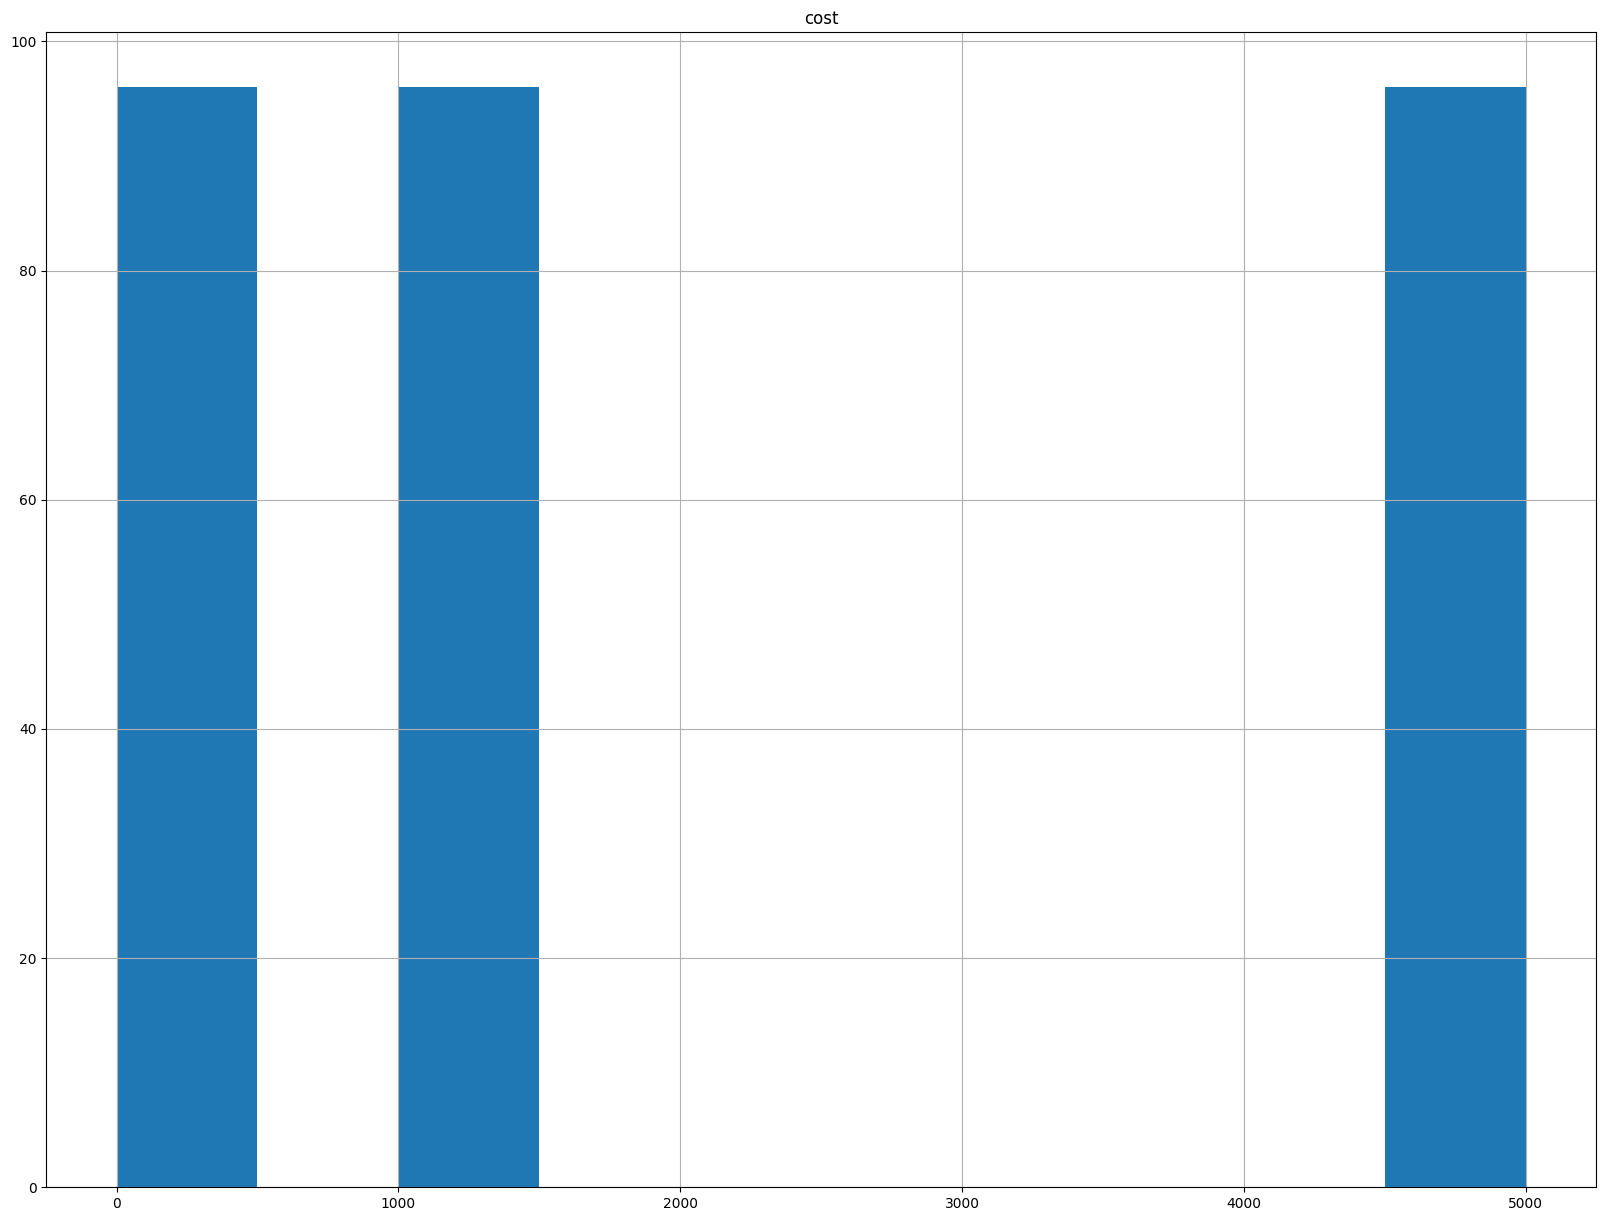

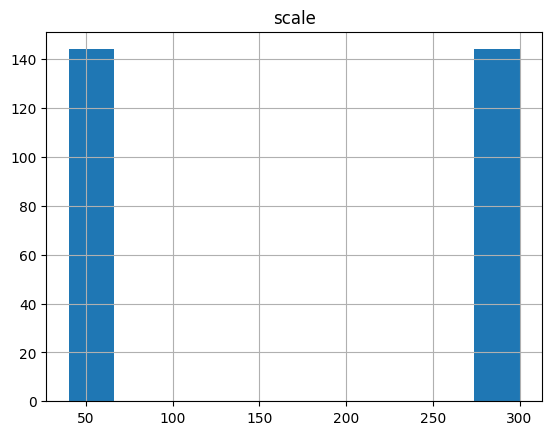

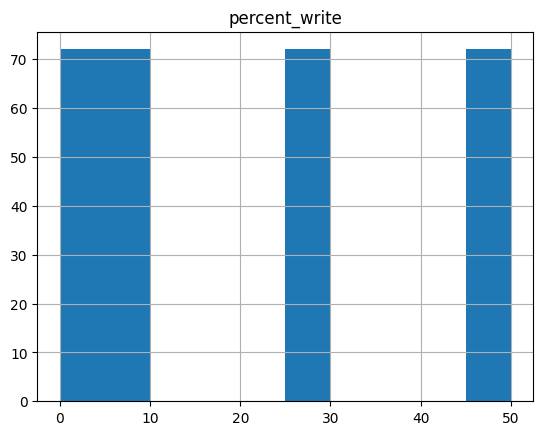

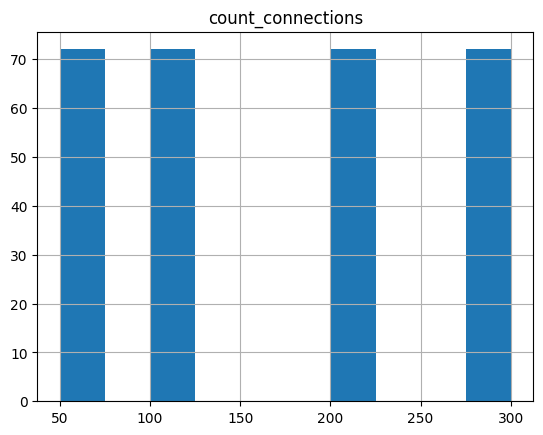

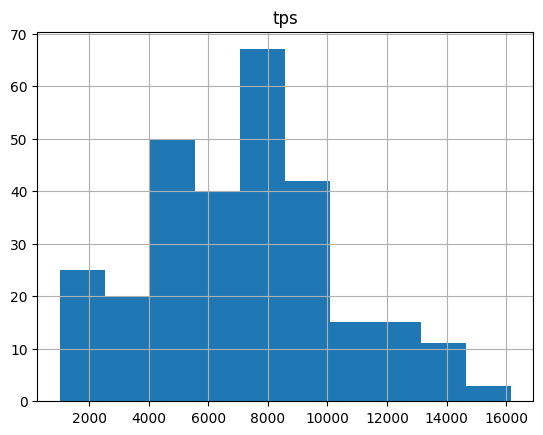

In [20]:
plt.figure(figsize=figsize)
for feature in heat_data.columns:
    if feature !='ID':
        df[feature].hist()
        plt.title(feature)
        plt.show()

Эм, а откуда взялся коннект на 400?

**теперь нет строк с количеством подключений в 400**

Хочется решить задачу регрессии или классификации, однако у меня нет точного признака хорошести или удачности.
Можно попытаться решить кластеризацию, однако мне кажется, тут не будет отдельных классов, а если и будут, то кривые какие-нибудь.
Теоретически с разными параметрами можно добиться произвольной производительности.
Как тогда решать ставить ли pgpool или нет?

In [21]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       288 non-null    int64  
 1   name                     288 non-null    object 
 2   cost                     288 non-null    int64  
 3   scale                    288 non-null    int64  
 4   percent_write            288 non-null    int64  
 5   pool_enabled             288 non-null    int64  
 6   count_connections        288 non-null    int64  
 7   cache_enabled            288 non-null    int64  
 8   base_in_cache            288 non-null    int64  
 9   tps                      288 non-null    float64
 10  initial_connection_time  288 non-null    float64
 11  latency_avg              288 non-null    float64
 12  latency_std              288 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 29.4+ KB


In [65]:
claster_df = df.drop([
    'id',
    'name',
    'initial_connection_time',
    'latency_avg',
    'latency_std',
], axis=1)

In [66]:
df.groupby(['cache_enabled']).count()

,id,name,cost,scale,percent_write,pool_enabled,count_connections,base_in_cache,tps,initial_connection_time,latency_avg,latency_std
cache_enabled,,,,,,,,,,,,
0,192,192,192,192,192,192,192,192,192,192,192,192
1,96,96,96,96,96,96,96,96,96,96,96,96


In [67]:
from sklearn.manifold import TSNE

# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(claster_df)

In [68]:
claster_df['big_tps'] = (claster_df['tps']>=11000).astype(int)
claster_df.describe()

,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,big_tps
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.00000,288.000000,288.000000
mean,2000.000000,170.000000,20.000000,0.666667,162.500000,0.333333,0.50000,7211.496139,0.118056
std,2164.007123,130.226284,19.719284,0.472225,96.181449,0.472225,0.50087,3173.479670,0.323236
min,0.000000,40.000000,0.000000,0.000000,50.000000,0.000000,0.00000,1019.225322,0.000000
25%,0.000000,40.000000,3.750000,0.000000,87.500000,0.000000,0.00000,5008.747236,0.000000
50%,1000.000000,170.000000,15.000000,1.000000,150.000000,0.000000,0.50000,7361.520214,0.000000
75%,5000.000000,300.000000,31.250000,1.000000,225.000000,1.000000,1.00000,9031.665231,0.000000
max,5000.000000,300.000000,50.000000,1.000000,300.000000,1.000000,1.00000,16151.522722,1.000000


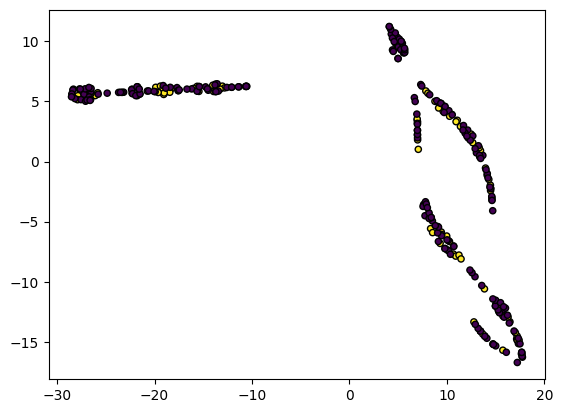

In [72]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

#почему-то необходимо передавать название колонки в кавычках, а не через точку
plt.scatter(x_axis, y_axis, c=claster_df['cache_enabled'], s=20, edgecolor="k")
plt.show()

Похоже кластеры появляются не зависимо от битов моих.Хм, может быть что-то да получится.
А может это просто обманка

## Добавление признака "успешность установки pgpool"

In [73]:
df_add = df.copy()

In [75]:
df_add['test_id'] = str(df_add['cost'])+str(df_add['scale'])+str(df_add['percent_write'])+str(df_add['count_connections'])+str(df_add['base_in_cache'])

In [76]:
df_add.head()

,id,name,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,initial_connection_time,latency_avg,latency_std,test_id
0,91,../results/cache_high/91.txt,5000,300,5,1,200,1,0,3957.608948,1662.348,50.529,53.033,0 5000\n1 0\n2 5000\n3 ...
1,56,../results/cache_high/56.txt,0,300,25,1,300,1,0,7410.819271,2320.749,40.475,28.797,0 5000\n1 0\n2 5000\n3 ...
2,95,../results/cache_high/95.txt,5000,300,0,1,200,1,0,2014.498079,1560.837,99.270,61.322,0 5000\n1 0\n2 5000\n3 ...
3,83,../results/cache_high/83.txt,5000,300,50,1,200,1,0,8326.162613,1728.101,24.015,13.597,0 5000\n1 0\n2 5000\n3 ...
4,88,../results/cache_high/88.txt,5000,300,25,1,300,1,0,2463.887750,2074.608,121.646,149.489,0 5000\n1 0\n2 5000\n3 ...


In [78]:
pool_groups = df_add.groupby(['pool_enabled'])

In [ ]:
#делю на тесты с включённым и выключенным pgpool
df_pool_disable = pool_groups.get_group((list(pool_groups.groups)[0]))
df_pool_enable = pool_groups.get_group((list(pool_groups.groups)[1]))

In [85]:
cache_groups = df_pool_enable.groupby(['cache_enabled'])

In [86]:
#делю тесты с включённым pgpool на тесты по кэшу включённому
df_cache_disable = cache_groups.get_group((list(cache_groups.groups)[0]))
df_cache_enable = cache_groups.get_group((list(cache_groups.groups)[1]))

In [89]:
#получу только id теста и результат в tps для тестов без pgpool
crop_df_pool_disable = df_pool_disable.loc[:, [
    'test_id',
    'tps'
]].copy()

In [91]:
crop_df_pool_disable.rename({'tps': 'no_pool_tps'}, axis=1, inplace=True)

**Выполню мёрджинг результатов без pgpool и с ним**

In [102]:
df_cache_disable_compare = df_cache_disable.merge(crop_df_pool_disable, how='left', left_on='test_id', right_on='test_id')
df_cache_enable_compare = df_cache_enable.merge(crop_df_pool_disable, how='left', left_on='test_id', right_on='test_id')

In [103]:
df_cache_enable_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       9216 non-null   int64  
 1   name                     9216 non-null   object 
 2   cost                     9216 non-null   int64  
 3   scale                    9216 non-null   int64  
 4   percent_write            9216 non-null   int64  
 5   pool_enabled             9216 non-null   int64  
 6   count_connections        9216 non-null   int64  
 7   cache_enabled            9216 non-null   int64  
 8   base_in_cache            9216 non-null   int64  
 9   tps                      9216 non-null   float64
 10  initial_connection_time  9216 non-null   float64
 11  latency_avg              9216 non-null   float64
 12  latency_std              9216 non-null   float64
 13  test_id                  9216 non-null   object 
 14  no_pool_tps             

что-то как-то криво выходит